In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as mp
import os
from glob import glob
import seaborn as sns
from post_process import ContainerFactory
from itertools import chain
import math

sns.set(style='ticks', context="talk")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def good_lists(events):
    '''
    df should contain words, rec end, and focus on events
    '''
    try:
        focus = events.query("type == 'focus'").query("value == 'on'").query("interval > 0").query("mstime > 0")
        focus_intervals = [pd.Interval(row.mstime - row['interval'], row['mstime']) for i, row in focus.iterrows()]

        list_interval  = pd.Interval(events.query("type == 'WORD' & serialpos == 1")['mstime'].iloc[0], 
                                     events.query("type == 'END_RECALL'")['mstime'].iloc[0])

        for focus_interval in focus_intervals:
            if list_interval.overlaps(focus_interval):
                return False
    except:
        return False
    
    return True

def multiindex_to_array(multiindex):
    new_index = pd.MultiIndex.from_product(multiindex.index.levels)
    multiindex = multiindex.reindex(new_index).fillna(np.nan)
    
    levels = [len(l) for l in multiindex.index.levels]
    return multiindex.values.reshape(*levels)

In [3]:
'''
    Condition Mapping:
    0 central, read aloud, hold keys
    1 spatial, read aloud, hold keys
    2 central, read silently, hold keys
    3 spatial, read silently, hold keys
    4 central, read aloud, don't hold keys
    5 spatial, read aloud, don't hold keys
    6 central, read silently, don't hold keys
    7 spatial, read silently, don't hold keys 
'''

paths_dict = {"experiment": 'ordered_recall',
              'root': '/data/behavioral/mturk'}
container = ContainerFactory.get_container(paths_dict)

subs = container.get_cleaned_data().query("type in ['WORD', 'focus', 'END_RECALL'] and 26 >= listno >= 3")
subs = subs.groupby(['condition', 'subject', 'listno']).filter(good_lists, dropna=True).query("type in ['WORD'] and listno >= 3")
subs = subs.sort_values("rt", ascending=True)
subs["recall_order"] = subs.groupby(['subject', 'listno']).cumcount()
subs["central_display"] = subs["condition"] % 2 < 1
subs["read_aloud"] = subs["condition"] % 4 < 2
subs["hold_keys"] = subs["condition"] % 8 < 4

# ordering of true and false matters here, for the moment
subs.loc[subs["central_display"] == False, "central_display"] = 'spatial'
subs.loc[subs["central_display"] == True, "central_display"] = 'central'

subs.loc[subs["read_aloud"] == False, "read_aloud"] = 'silent'
subs.loc[subs["read_aloud"] == True, "read_aloud"] = 'aloud'

subs.loc[subs["hold_keys"] == False, "hold_keys"] = 'nohold'
subs.loc[subs["hold_keys"] == True, "hold_keys"] = 'hold'

In [3]:
subs.loc[subs["subject"] == subs.subject.iloc[1]]

,index,type,mstime,value,interval,length,conditions,item,held_over,key_up,key_down,rt_up,rt_down,position,grid_size,mode,rt,target,start_positions,end_positions,subject,condition,counterbalance,itemno,itemnos,listno,serialpos,recalled,correct,distance,relative_correct,recall_order,central_display,read_aloud,hold_keys
566,172,WORD,1079114.0,None,NaN,8.0,"{'pos': 'static', 'max_list': '16'}",SPARROW,[],[],[],[],[],"[2, 2]","[3, 3]",None,1157.0,NaN,None,None,MTK00124,4,31,458.0,None,13,8.0,8.0,1.0,0.0,1.0,0,central,aloud,nohold
1096,314,WORD,1797245.0,None,NaN,8.0,"{'pos': 'static', 'max_list': '16'}",QUARTER,[],[],[],[],[],"[2, 2]","[3, 3]",None,1386.0,NaN,None,None,MTK00124,4,31,388.0,None,25,6.0,6.0,1.0,0.0,1.0,0,central,aloud,nohold
664,204,WORD,1211296.0,None,NaN,16.0,"{'pos': 'static', 'max_list': '16'}",SURVEY,[],[],[],[],[],"[2, 2]","[3, 3]",None,1511.0,NaN,None,None,MTK00124,4,31,482.0,None,15,16.0,16.0,1.0,0.0,1.0,0,central,aloud,nohold
1136,332,WORD,1866746.0,None,NaN,16.0,"{'pos': 'static', 'max_list': '16'}",ROBIN,[],[],[],[],[],"[2, 2]","[3, 3]",None,1531.0,NaN,None,None,MTK00124,4,31,404.0,None,26,16.0,16.0,1.0,0.0,1.0,0,central,aloud,nohold
530,164,WORD,971852.0,None,NaN,12.0,"{'pos': 'static', 'max_list': '16'}",POPCORN,[],[],[],[],[],"[2, 2]","[3, 3]",None,1846.0,NaN,None,None,MTK00124,4,31,374.0,None,12,12.0,12.0,1.0,0.0,1.0,0,central,aloud,nohold
956,278,WORD,1609390.0,None,NaN,12.0,"{'pos': 'static', 'max_list': '16'}",SHERIFF,[],[],[],[],[],"[2, 2]","[3, 3]",None,1893.0,NaN,None,None,MTK00124,4,31,433.0,None,22,10.0,10.0,1.0,0.0,0.0,0,central,aloud,nohold
565,171,WORD,1077302.0,None,NaN,8.0,"{'pos': 'static', 'max_list': '16'}",PISTOL,[],[],[],[],[],"[2, 2]","[3, 3]",None,1912.0,NaN,None,None,MTK00124,4,31,360.0,None,13,7.0,7.0,1.0,0.0,0.0,1,central,aloud,nohold
753,223,WORD,1324483.0,None,NaN,8.0,"{'pos': 'static', 'max_list': '16'}",TWIG,[],[],[],[],[],"[2, 2]","[3, 3]",None,1961.0,NaN,None,None,MTK00124,4,31,517.0,None,17,7.0,7.0,1.0,0.0,0.0,0,central,aloud,nohold
186,72,WORD,459251.0,None,NaN,16.0,"{'pos': 'static', 'max_list': '16'}",SUMMIT,[],[],[],[],[],"[2, 2]","[3, 3]",None,2000.0,NaN,None,None,MTK00124,4,31,478.0,None,4,16.0,16.0,1.0,0.0,1.0,0,central,aloud,nohold
141,55,WORD,386868.0,None,NaN,12.0,"{'pos': 'static', 'max_list': '16'}",ORCHID,[],[],[],[],[],"[2, 2]","[3, 3]",None,2211.0,NaN,None,None,MTK00124,4,31,322.0,None,3,11.0,11.0,1.0,0.0,0.0,0,central,aloud,nohold


In [16]:
subs.groupby(["subject", "condition"]).listno.nunique().groupby(["condition"]).mean()

condition
0    23.000000
1    23.033898
2    23.234375
3    23.016949
4    23.216667
5    22.653846
6    23.163934
7    22.932203
Name: listno, dtype: float64

In [17]:
print(f"Total Subjects: {len(subs.subject.unique())}")
print(subs.groupby('condition')["subject"].nunique())

Total Subjects: 467
condition
0    53
1    59
2    64
3    59
4    60
5    52
6    61
7    59
Name: subject, dtype: int64


In [18]:
from os import path

with open(path.join(container.paths_dict["root"], "WROTE_NOTES.txt"), 'r') as f:
    notes_subs = [line.strip() for line in f.readlines()]
    
with open(path.join(container.paths_dict["root"], "EXCLUDED.txt"), 'r') as f:
    excluded_subs = [line.strip() for line in f.readlines()]
    
unclean_subs = container.get_cleaned_data(container.get_subject_codes(cleaned=True))
unclean_subs = unclean_subs.merge(unclean_subs.groupby(['condition', 'subject', 'listno']).apply(good_lists).rename("good_list").reset_index(), how="outer")
unclean_subs = unclean_subs.query("type == 'WORD'").drop_duplicates(subset=['condition', 'subject', 'listno'])

unclean_subs["central_display"] = unclean_subs["condition"] % 2 < 1
unclean_subs["read_aloud"] = unclean_subs["condition"] % 4 < 2
unclean_subs["hold_keys"] = unclean_subs["condition"] % 8 < 4

unclean_subs_minimal = unclean_subs.groupby(['subject','condition', 'hold_keys']).size().reset_index()

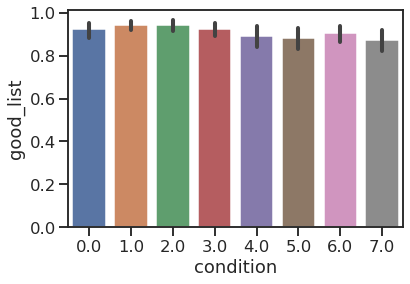

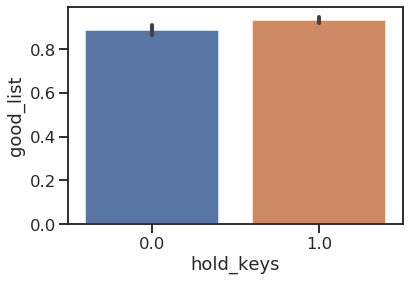

In [19]:
# focus on distribution

# bad list distribution
sns.barplot(x='condition', y='good_list', data=unclean_subs.groupby('subject').mean())
mp.show()

sns.barplot(x='hold_keys', y='good_list', data=unclean_subs.groupby('subject').mean())
mp.show()

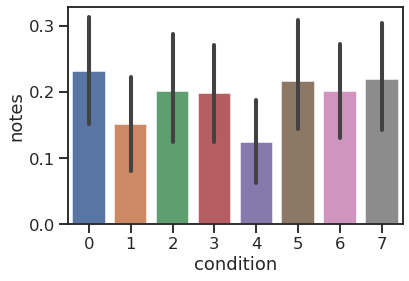

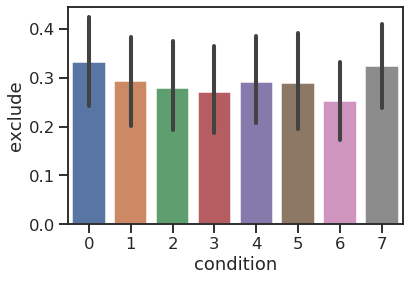

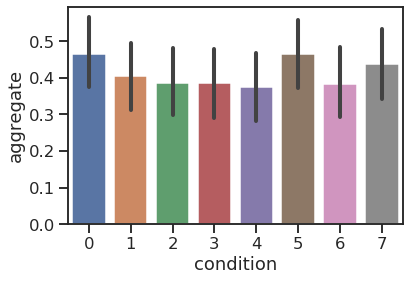

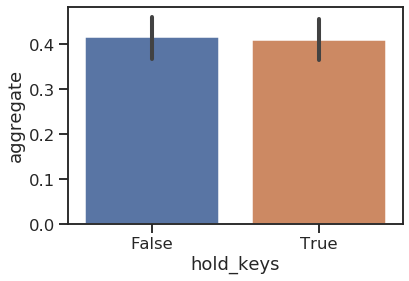

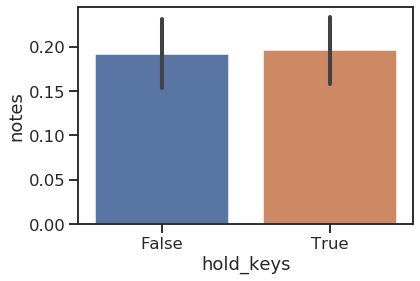

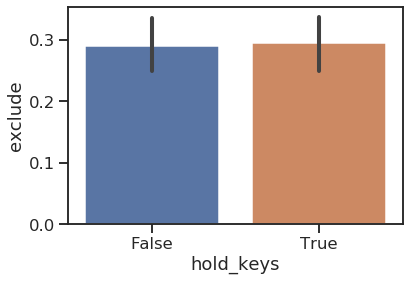

In [20]:
# Check for wrote notes distribution
unclean_subs_minimal["notes"] = unclean_subs_minimal.apply(lambda x: x.subject in notes_subs, axis=1)
sns.barplot(x='condition', y='notes', data=unclean_subs_minimal)
mp.show()

unclean_subs_minimal["exclude"] = unclean_subs_minimal.apply(lambda x: x.subject in excluded_subs, axis=1)
sns.barplot(x='condition', y='exclude', data=unclean_subs_minimal)
mp.show()

unclean_subs_minimal["aggregate"] = unclean_subs_minimal["notes"] | unclean_subs_minimal["exclude"]
sns.barplot(x='condition', y='aggregate', data=unclean_subs_minimal)
mp.show()

sns.barplot(x='hold_keys', y='aggregate', data=unclean_subs_minimal)
mp.show()

sns.barplot(x='hold_keys', y='notes', data=unclean_subs_minimal)
mp.show()

sns.barplot(x='hold_keys', y='exclude', data=unclean_subs_minimal)
mp.show()

In [21]:
temp = container.get_cleaned_data(container.get_subject_codes(cleaned=True)) # used for during list determination
dat = temp.query("type=='focus'") \
          .query("value == 'on'") \
          .query("interval > 0") \
          .query("mstime > 0") 

dat["stime"] = dat["mstime"] / 1000
dat["interval"] = dat["interval"] / 1000

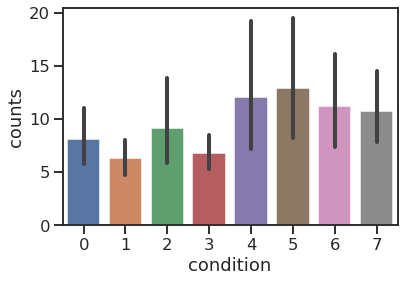

In [22]:
counts = pd.DataFrame(dat.groupby(['subject', 'condition']).size().rename("counts")).reset_index()
sns.barplot(x='condition', y='counts', data=counts)
mp.show()

counts["condition"] = counts["condition"] % 8 < 4 # hold keys
sns.barplot(x='condition', y='counts', data=counts)
mp.close()

In [25]:
# what is up with condition 0?
counts.query("condition == 0")

,subject,condition,counts
0,MTK00001,False,2
1,MTK00002,False,1
3,MTK00004,False,3
6,MTK00008,False,2
8,MTK00010,False,9
9,MTK00011,False,5
10,MTK00012,False,3
11,MTK00014,False,5
12,MTK00016,False,3
14,MTK00019,False,12


In [26]:
# what is up with condition 5?
counts.query("condition == 5")

,subject,condition,counts


In [27]:
def during_list(row):
    '''
    df should contain words, rec end, and focus on events
    '''
    
    try:
        focus_interval = pd.Interval(row.mstime - row['interval'], row['mstime'])
        start_list = temp.query("subject == @row.subject & listno == @row.listno & type == 'WORD' & serialpos == 1")['mstime'].iloc[0]
        start_rec  = temp.query("subject == @row.subject & listno == @row.listno & type == 'START_RECALL'")['mstime'].iloc[0]
        end_rec    = temp.query("subject == @row.subject & listno == @row.listno & type == 'END_RECALL'")['mstime'].iloc[0]
        
        list_interval  = pd.Interval(start_list, 
                                     start_rec)
        
        rec_interval = pd.Interval(start_rec, 
                                   end_rec)
                                     
        if list_interval.overlaps(focus_interval):
            return 'encoding'
        elif rec_interval.overlaps(focus_interval):
            return 'recall'
        else:
            return 'neither'
    except:
        return 'neither'


In [28]:
dat["during_list"] = dat.apply(during_list, axis=1)

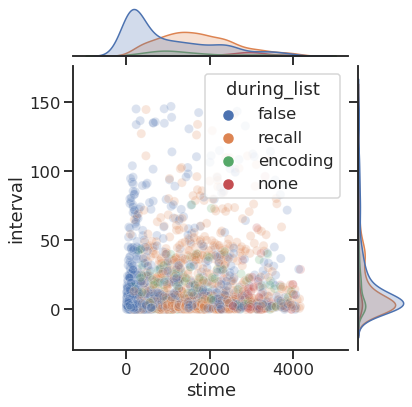

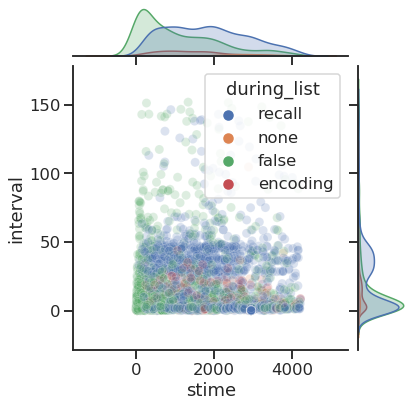

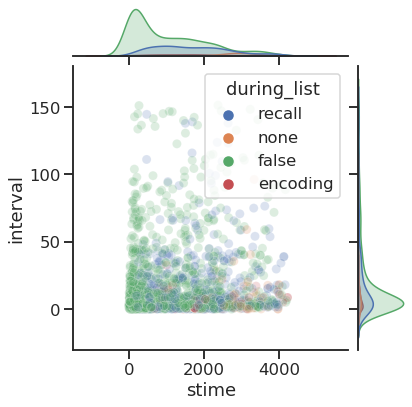

In [29]:
x=dat.stime
y=dat.interval
removed_outliers = y.between(y.quantile(.0), y.quantile(.95)) & x.between(x.quantile(.0), x.quantile(.95))


dat["notes"] = dat.apply(lambda x: x.subject in notes_subs, axis=1)
dat["exclude"] = dat.apply(lambda x: x.subject in excluded_subs, axis=1)
dat["aggregate"] = dat["notes"] | dat["exclude"]
# color by in list


sns.jointplot(x="stime", y="interval", hue='during_list', data=dat[removed_outliers].query("condition % 8 < 4"), alpha=.2); # held keys
mp.show()

sns.jointplot(x="stime", y="interval", hue='during_list', data=dat[removed_outliers].query("condition % 8 >= 4"), alpha=.2); # didn't hold keys
mp.show()

sns.jointplot(x="stime", y="interval", hue='during_list', data=dat[removed_outliers].query("aggregate == False"), alpha=.2); # after exclusion
mp.show()

## Pivot Table Generation

In [14]:
# TODO: I don't actually need any of these pivots for most of the plots...
pivot = subs.pivot_table(index=['subject', 
                                'central_display', 
                                'read_aloud', 
                                'hold_keys', 
                                'listno', 
                                'length'], 
                         columns='serialpos',                   
                         values=['rt', 
                                 'recalled', 
                                 'correct',
                                 'relative_correct',
                                 'distance'])
    
all_lists = pivot.groupby(['subject', 
                           'central_display', 
                           'read_aloud', 
                           'hold_keys', 
                           'length'])

only_correct = subs.query('distance == 0') \
                   .pivot_table(index=['subject', 
                                       'central_display', 
                                       'read_aloud', 
                                       'hold_keys', 
                                       'listno', 
                                       'length'], 
                                columns='serialpos',                   
                                values=['rt', 
                                        'recalled',
                                        'correct', 
                                        'distance']) \
                   .groupby(['subject',
                             'central_display', 
                             'read_aloud', 
                             'hold_keys', 
                             'length'])

only_relative_correct = subs.query('relative_correct == 1') \
                           .pivot_table(index=['subject', 
                                               'central_display', 
                                               'read_aloud', 
                                               'hold_keys', 
                                               'listno', 
                                               'length'], 
                                        columns='serialpos',                   
                                        values=['rt', 
                                                'recalled',
                                                'correct',
                                                'relative_correct', 
                                                'distance']) \
                           .groupby(['subject',
                                     'central_display', 
                                     'read_aloud', 
                                     'hold_keys', 
                                     'length'])

all_correct = pivot[pivot['correct'].sum(axis=1) 
                    == pivot.index.get_level_values('length')]\
              .groupby(['subject', 
                        'central_display', 
                        'read_aloud', 
                        'hold_keys', 
                        'length'])


In [227]:
len(all_lists.mean().index.get_level_values('subject').unique())

467

In [228]:
'''
    0 central, read aloud, hold keys
    1 spatial, read aloud, hold keys
    2 central, read silently, hold keys
    3 spatial, read silently, hold keys
    4 central, read aloud, don't hold keys
    5 spatial, read aloud, don't hold keys
    6 central, read silently, don't hold keys
    7 spatial, read silently, don't hold keys 
'''
subs.groupby(["subject"]).mean().describe()

,index,mstime,interval,length,rt,target,condition,counterbalance,itemno,listno,serialpos,recalled,correct,distance,relative_correct,recall_order
count,467.000000,4.670000e+02,0.0,467.000000,467.000000,0.0,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.0,467.000000,467.000000
mean,193.152023,2.019909e+06,NaN,12.864775,29551.325835,NaN,3.518201,50.002141,276.319889,14.488214,6.932388,6.932388,0.545115,0.0,0.515065,5.932388
std,15.379624,2.028985e+06,NaN,0.175770,9465.601839,NaN,2.275356,29.992810,6.288135,0.401301,0.087885,0.087885,0.178416,0.0,0.194208,0.087885
min,163.000000,9.578461e+05,NaN,10.400000,11090.952992,NaN,0.000000,0.000000,257.850694,10.520833,5.700000,5.700000,0.163194,0.0,0.128472,4.700000
25%,183.500000,1.501219e+06,NaN,12.888889,23208.450729,NaN,2.000000,22.500000,272.109677,14.444444,6.944444,6.944444,0.405777,0.0,0.364583,5.944444
50%,187.557143,1.727445e+06,NaN,12.888889,28197.240645,NaN,3.000000,51.000000,275.958333,14.500000,6.944444,6.944444,0.524306,0.0,0.488806,5.944444
75%,197.337577,2.082198e+06,NaN,12.888889,33634.978369,NaN,6.000000,77.000000,280.688923,14.569444,6.944444,6.944444,0.670214,0.0,0.652778,5.944444
max,319.987179,4.229696e+07,NaN,13.355932,77207.329546,NaN,7.000000,99.000000,297.725694,16.383333,7.177966,7.177966,1.000000,0.0,1.000000,6.177966


## Absolute Order SPC

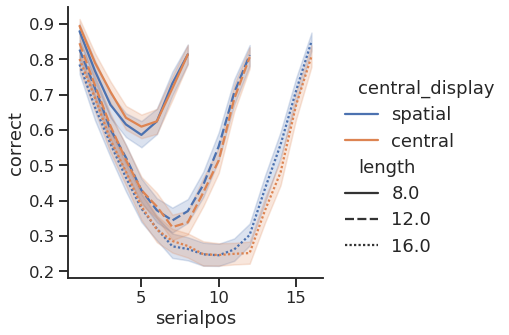

In [303]:
fg = sns.relplot(x='serialpos', y='correct', style="length", hue='central_display', kind='line', data=all_lists.mean().stack().reset_index())
fg.tight_layout()
fg.savefig("OrderedRecall/fig1.png")

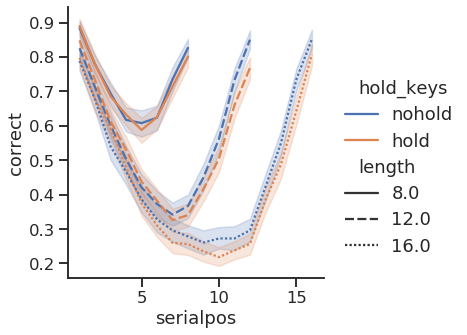

In [230]:
test = subs.groupby(['subject', 
                    'central_display', 
                    'read_aloud', 
                    'hold_keys', 
                    'length',
                    'serialpos']).mean().reset_index()
fg = sns.relplot(x='serialpos', y='correct', style="length", hue='hold_keys', kind='line', data=test)
fg.tight_layout()

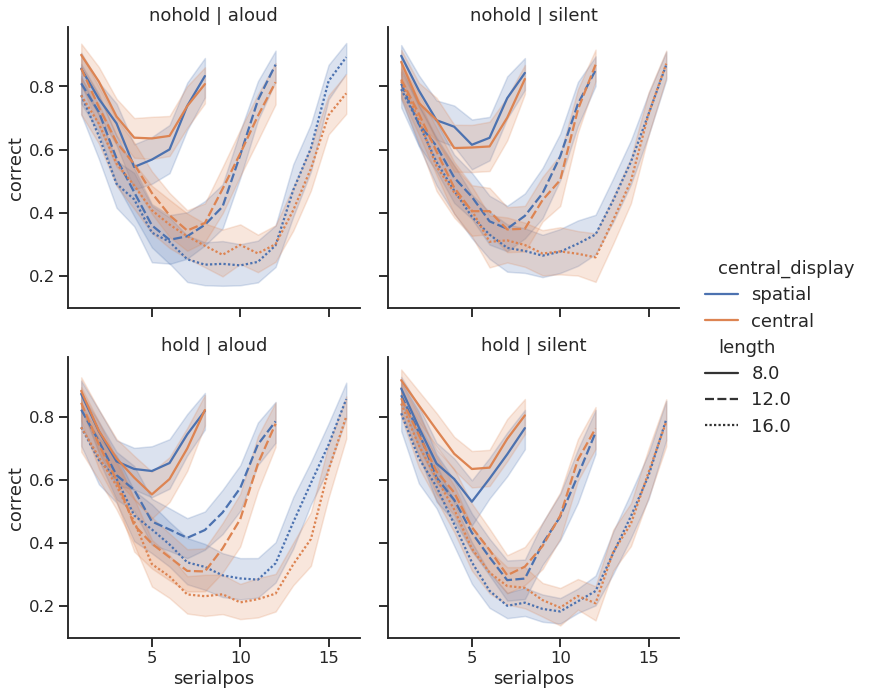

In [231]:
fg = sns.relplot(x='serialpos', y='correct', style="length", hue='central_display', row='hold_keys', col='read_aloud', kind='line', data=all_lists.mean().stack().reset_index())
fg.set_titles(col_template="{col_name}", row_template="{row_name}")
fg.tight_layout()
fg.savefig("OrderedRecall/fig2.png")

## Relative Order SPC

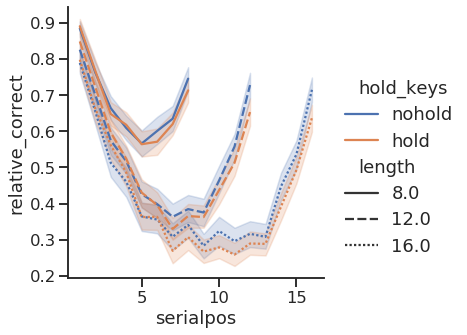

In [232]:
fg = sns.relplot(x='serialpos', y='relative_correct', style="length", hue='hold_keys', kind='line', data=all_lists.mean().stack().reset_index())
fg.tight_layout()
fg.savefig("OrderedRecall/fig1.png")

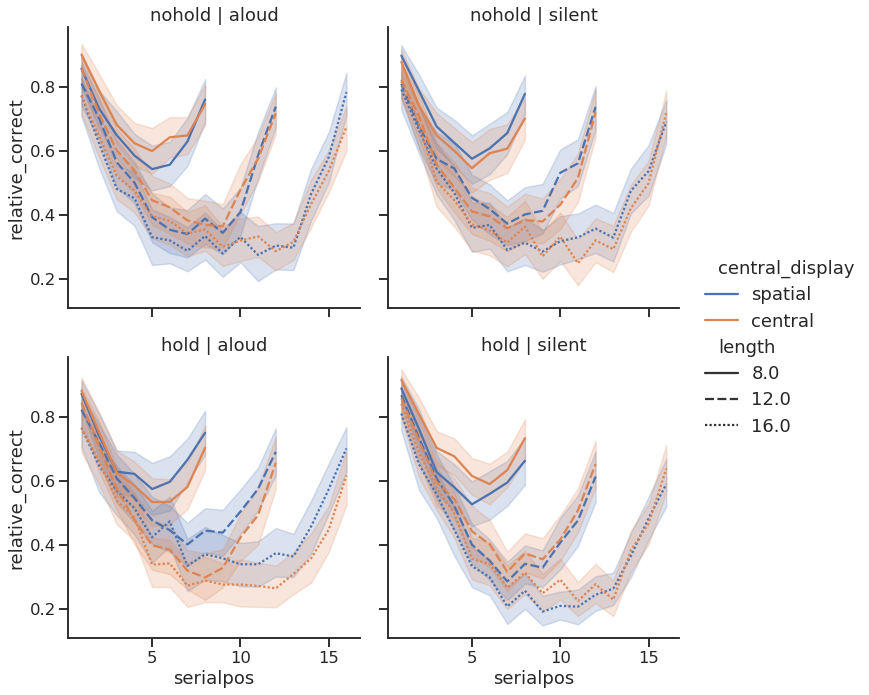

In [233]:
fg = sns.relplot(x='serialpos', y='relative_correct', style="length", hue='central_display', row='hold_keys', col='read_aloud', kind='line', data=all_lists.mean().stack().reset_index())
fg.set_titles(col_template="{col_name}", row_template="{row_name}")
fg.tight_layout()
fg.savefig("OrderedRecall/fig2.png")

## Recall Distance x Serial Position

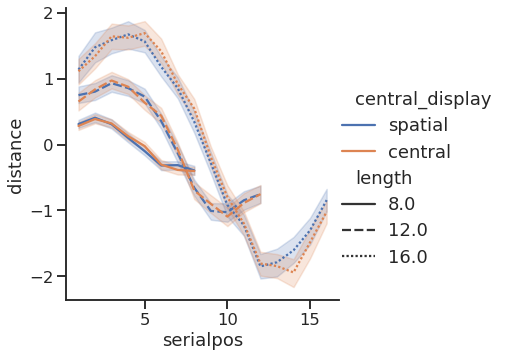

In [234]:
sns.relplot(x='serialpos', y='distance', style="length", hue='central_display', kind='line', data=all_lists.mean().stack().reset_index())

## Correct RT

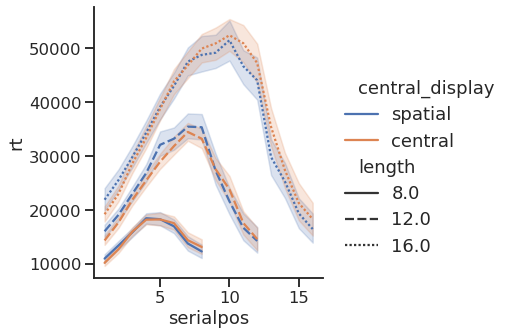

In [235]:
fg = sns.relplot(x='serialpos', y='rt', style="length", hue='central_display', kind='line', data=only_correct.mean().stack().reset_index())
fg.tight_layout()
fg.savefig("OrderedRecall/fig3.png")

## Relative Correct RT

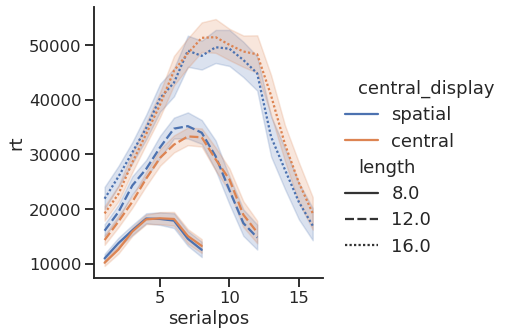

In [236]:
fg = sns.relplot(x='serialpos', y='rt', style="length", hue='central_display', kind='line', data=only_relative_correct.mean().stack().reset_index())
fg.tight_layout()
fg.savefig("OrderedRecall/fig3.png")

## Correct IRT

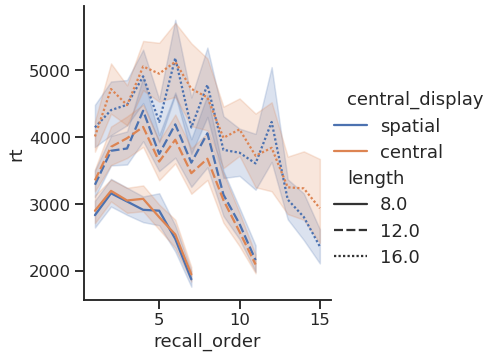

In [237]:
irts = subs.query("correct == 1.0").pivot_table(index=['subject', 
                                       'central_display', 
                                       'read_aloud', 
                                       'hold_keys', 
                                       'listno', 
                                       'length'], 
                                columns='recall_order',                   
                                values=['rt']) \
                   .diff(axis=1) \
                   .groupby(['subject',
                             'central_display', 
                             'read_aloud', 
                             'hold_keys', 
                             'length']) \
                  .mean().stack().reset_index()

sns.relplot(x='recall_order', y='rt', style="length", hue='central_display', kind='line', data=irts)

## Relative Correct IRT

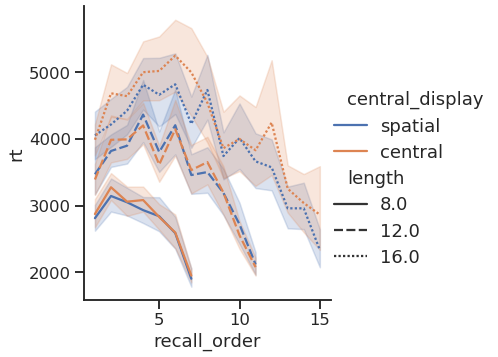

In [238]:
irts = subs.query("relative_correct == 1.0").pivot_table(index=['subject', 
                                       'central_display', 
                                       'read_aloud', 
                                       'hold_keys', 
                                       'listno', 
                                       'length'], 
                                columns='recall_order',                   
                                values=['rt']) \
                   .diff(axis=1) \
                   .groupby(['subject',
                             'central_display', 
                             'read_aloud', 
                             'hold_keys', 
                             'length']) \
                  .mean().stack().reset_index()

sns.relplot(x='recall_order', y='rt', style="length", hue='central_display', kind='line', data=irts)

## Prior Recall Distance

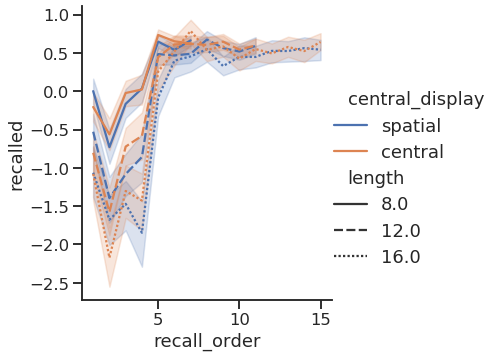

In [239]:
irts = subs.pivot_table(index=['subject', 
                                       'central_display', 
                                       'read_aloud', 
                                       'hold_keys', 
                                       'listno', 
                                       'length'], 
                                columns='recall_order',                   
                                values=['recalled']) \
                   .diff(axis=1) \
                   .groupby(['subject',
                             'central_display', 
                             'read_aloud', 
                             'hold_keys', 
                             'length']) \
                  .mean().stack().reset_index()

sns.relplot(x='recall_order', y='recalled', style="length", hue='central_display', kind='line', data=irts)

## Recall Probability by Serial Position

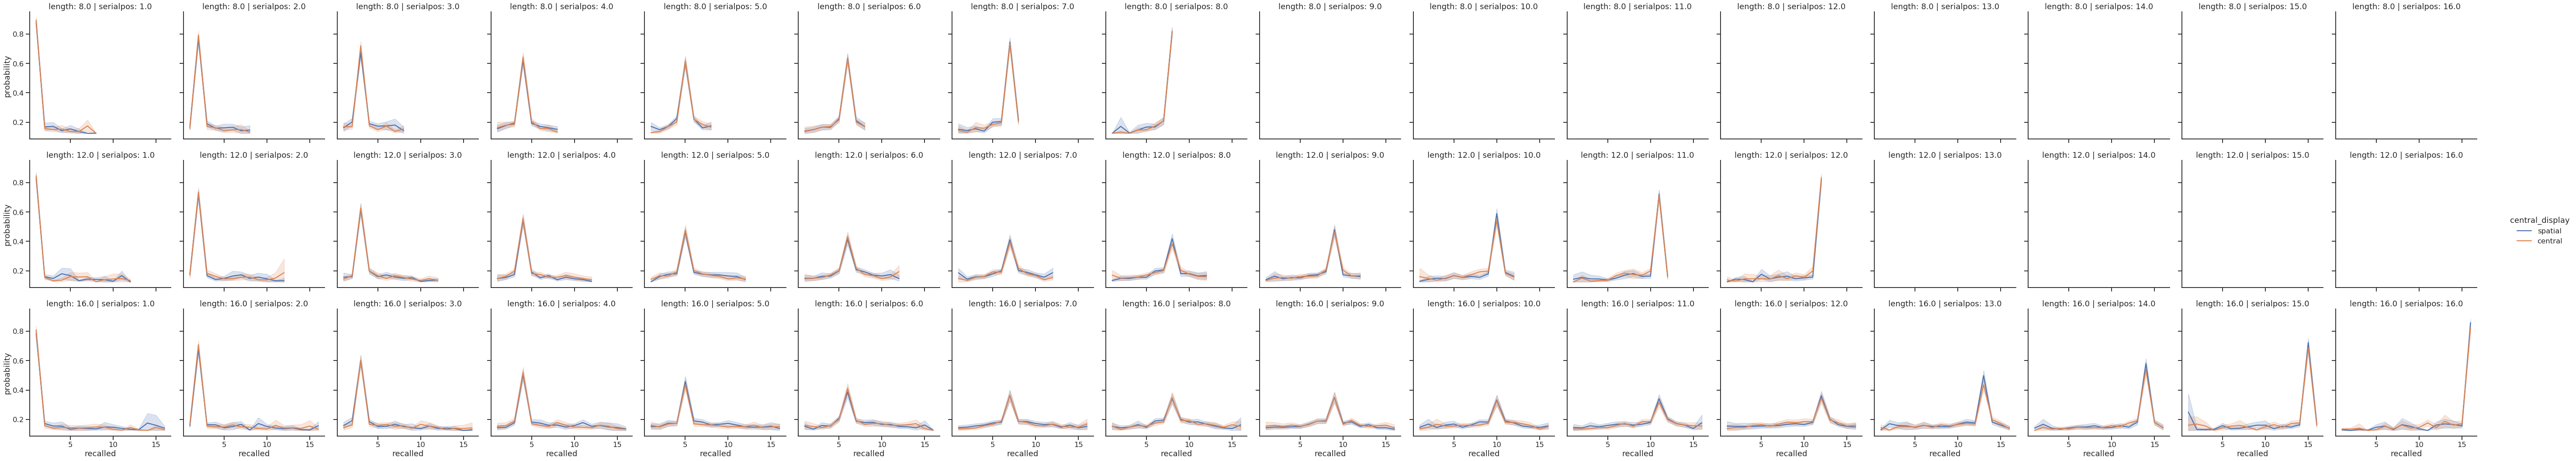

In [240]:
dist = subs.groupby(['subject', 'central_display', 
                     'read_aloud', 'hold_keys', 
                     'length', 'serialpos', 'recalled']) \
            .size() \
            .to_frame(name='probability') \
      / subs.groupby(['subject', 'central_display', 
                      'length', 'read_aloud', 
                      'hold_keys', 'serialpos']) \
            .size() \
            .to_frame('probability')

fg = sns.relplot(x='recalled', y='probability', row="length", hue='central_display', col='serialpos', kind='line', data=dist)
fg.set_titles(row_template="length: {row_name}", col_template="serialpos: {col_name}")
fg.tight_layout()
fg.savefig("OrderedRecall/fig6.png")

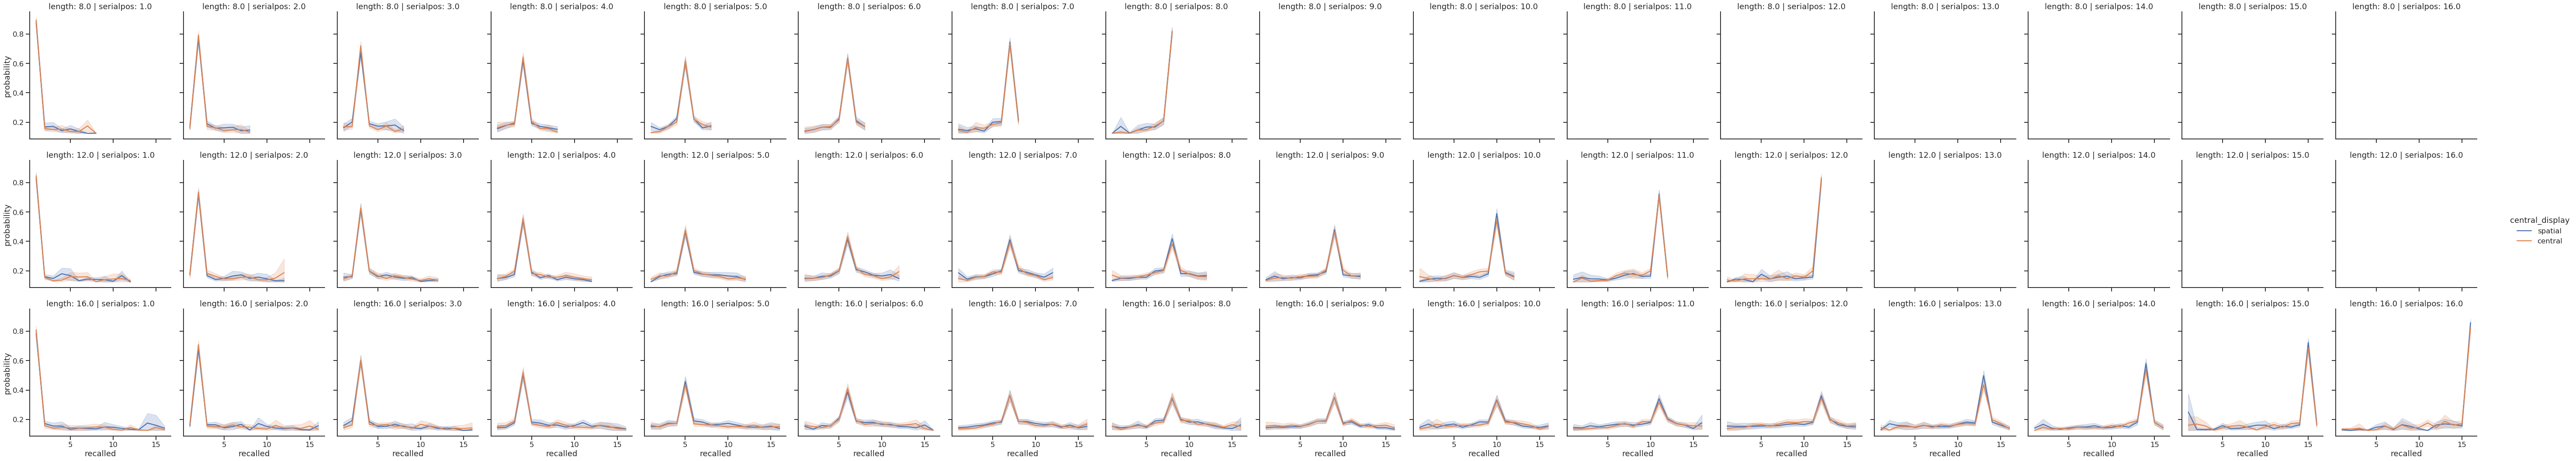

In [240]:
dist = subs.groupby(['subject', 'central_display', 
                     'read_aloud', 'hold_keys', 
                     'length', 'serialpos', 'recalled']) \
            .size() \
            .to_frame(name='probability') \
      / subs.groupby(['subject', 'central_display', 
                      'length', 'read_aloud', 
                      'hold_keys', 'serialpos']) \
            .size() \
            .to_frame('probability')

fg = sns.relplot(x='recalled', y='probability', row="length", hue='central_display', col='serialpos', kind='line', data=dist)
fg.set_titles(row_template="length: {row_name}", col_template="serialpos: {col_name}")
fg.tight_layout()
fg.savefig("OrderedRecall/fig6.png")

## 3D matrix plot

In [4]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
mp.close()

def matrix_to_plot(matrix, scale=20, label=['','','']):
    mask = ~np.isnan(matrix)
    x,y,z = np.nonzero(mask)
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111, projection='3d')
    img = ax.scatter(x, y, z, c=matrix[x, y, z], cmap='plasma', s=((matrix[x, y, z]/np.max(matrix[x, y, z]))**2)*scale)
    
    ax.set_xlabel(label[0])
    ax.set_ylabel(label[1])
    ax.set_zlabel(label[2])
    
    return fig

In [5]:
# final dimensions: input pos, output pos, recall order
%matplotlib widget
dist = subs.query("length == 8").groupby(['subject', 'serialpos', 'recalled', 'recall_order']) \
            .size() \
            .to_frame(name='probability') \
         / subs.query("length == 8").groupby(['subject']) \
            .size() \
            .to_frame(name='probability')

recall_modes_array = multiindex_to_array(dist.groupby(['serialpos', 'recalled', 'recall_order']).mean())
matrix_to_plot(recall_modes_array, label=('serial pos', 'reconstructed position', 'recall order'), scale=1000).show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [6]:
# final dimensions: input pos, output pos, recall order
%matplotlib widget
dist = subs.query("length == 12").groupby(['subject', 'serialpos', 'recalled', 'recall_order']) \
            .size() \
            .to_frame(name='probability') \
         / subs.query("length == 12").groupby(['subject']) \
            .size() \
            .to_frame(name='probability')

recall_modes_array = multiindex_to_array(dist.groupby(['serialpos', 'recalled', 'recall_order']).mean())
matrix_to_plot(recall_modes_array, label=('input serial pos', 'output serial pos', 'recall order'), scale=1000).show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
# final dimensions: input pos, output pos, recall order
%matplotlib widget
dist = subs.query("length == 16").groupby(['subject', 'serialpos', 'recalled', 'recall_order']) \
            .size() \
            .to_frame(name='probability') \
         / subs.query("length == 16").groupby(['subject']) \
            .size() \
            .to_frame(name='probability')

recall_modes_array = multiindex_to_array(dist.groupby(['serialpos', 'recalled', 'recall_order']).mean())
matrix_to_plot(recall_modes_array, label=('input serial pos', 'output serial pos', 'recall order'), scale=1000).show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [271]:
mp.close()

## Conditional drag/drop ordering

## Error Distance

In [ ]:
dist = subs.groupby(['subject', 'central_display', 
                     'read_aloud', 'hold_keys', 
                     'length', 'serialpos', 'recalled']) \
            .size() \
            .to_frame(name='probability') \
      / subs.groupby(['subject', 'central_display', 
                      'length', 'read_aloud', 
                      'hold_keys', 'serialpos']) \
            .size() \
            .to_frame('probability')

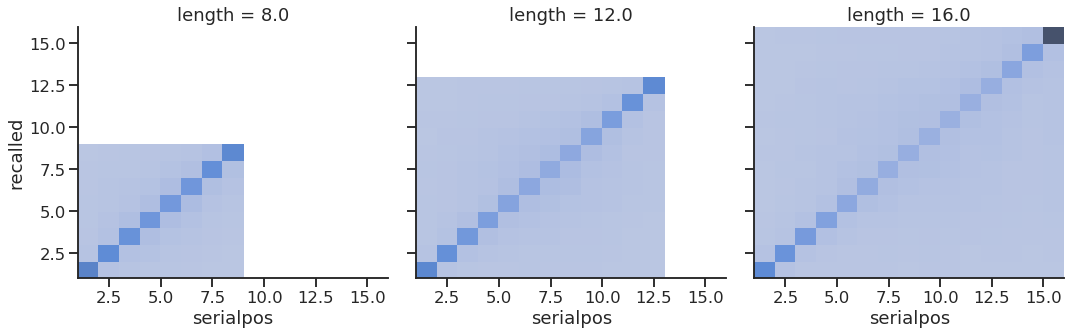

In [125]:
sns.displot(data=subs, x='serialpos', y='recalled', col='length', binwidth=(1, 1))

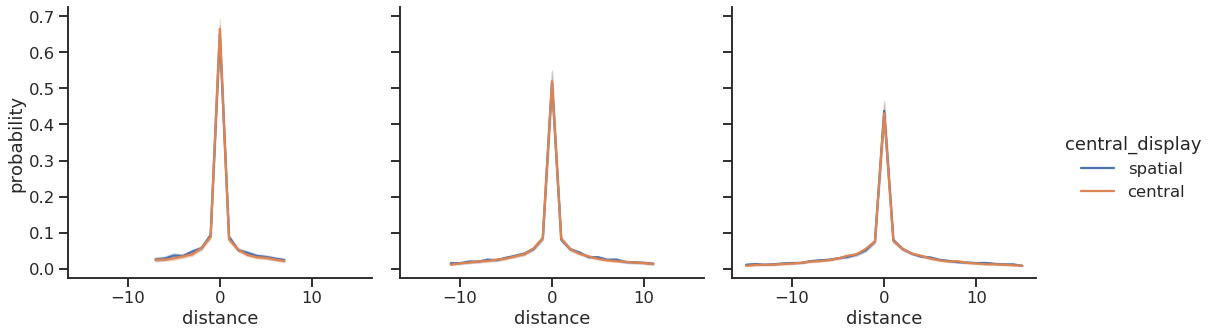

In [126]:
dist = subs.groupby(['subject', 'central_display', 
                     'read_aloud', 'hold_keys', 
                     'length', 'distance']) \
            .size() \
            .to_frame(name='probability') \
      / subs.groupby(['subject', 'central_display', 
                      'length', 'read_aloud', 
                      'hold_keys']) \
            .size() \
            .to_frame('probability')

fg = sns.relplot(x='distance', y='probability', col='length', hue='central_display', kind='line', data=dist)
fg.set_titles(col_template="")
fg.tight_layout()
fg.savefig("OrderedRecall/fig7.png")

## Data Saving

In [39]:
# tuples (condition, 8 rec, 12 rec, 16 rec)
rec_data = []

# loop over subjects
for sub in subs.subject.unique():
    sub_dat = all_lists.mean().query("subject == @sub")
    
    rec_tup = [sub,sub_dat.index.get_level_values('central_display')[0], 
               sub_dat.index.get_level_values('read_aloud')[0], 
               sub_dat.index.get_level_values('hold_keys')[0]]
    
    if len(sub_dat.index.get_level_values("length")) < 3:
        continue
        
    for ll in sorted(sub_dat.index.get_level_values("length")):
        lst_dat = sub_dat.query("length == @ll")["correct"].values[0, :int(ll)]
            
        rec_tup.extend(lst_dat)
    rec_data.append(tuple(rec_tup))

header = ['subject', 'central_display', 'read_aloud', 'held_keys', *(f"ll8_{sp + 1}" for sp in range(8)), *(f"ll12_{sp + 1}" for sp in range(12)), *(f"ll16_{sp + 1}" for sp in range(16))]
with open("recall_file.csv", 'w') as f:
    f.write(','.join(header))
    f.write('\n')
    for r in rec_data:
        f.write(','.join((str(i) for i in r)))
        f.write('\n')

In [33]:
rt_data = []
# loop over subjects
for sub in only_correct.mean().index.get_level_values('subject').unique():

    sub_dat = only_correct.mean().query("subject == @sub")
    sub_dat = sub_dat.iloc[:, sub_dat.columns.get_level_values(0) == 'rt']
   
    if not len(sub_dat):
        continue
    
    rt_tup = [sub,
              sub_dat.index.get_level_values('central_display')[0], 
              sub_dat.index.get_level_values('read_aloud')[0], 
              sub_dat.index.get_level_values('hold_keys')[0]]
    
    missing=False
    for ll in sorted(sub_dat.index.get_level_values("length")):
        lst_dat = sub_dat.query("length == @ll")["rt"].values[0, :int(ll)]
        
        if(np.any(np.isnan(lst_dat))):
            missing = True
            break

        rt_tup.extend(lst_dat)
    
    if not missing:
        rt_data.append(tuple(rt_tup))
    
header = ['subject', 'central_display', 
          'read_aloud', 'held_keys', 
          *chain.from_iterable(
              ((f"ll{int(ll)}_{sp + 1}" for sp in range(int(ll))) 
              for ll in sorted(sub_dat.index.get_level_values("length")))
          )]
with open("rt_file_dropna.csv", 'w') as f:
    f.write(','.join(header))
    f.write('\n')
    for r in rt_data:
        f.write(','.join((str(int(round(i))) if isinstance(i, (float, int)) else str(i) for i in r)))
        f.write('\n')